# NB5. Information Cascades
## 1. Network Simulation

A. Simulate a Random Network with N = 50 and p = 5%. Make a visualization of the graph. Make sure your network is connected.

In [10]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation
import matplotlib.pyplot as plt
from random import sample
from pathlib import Path
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib
import imageio
import random
import time

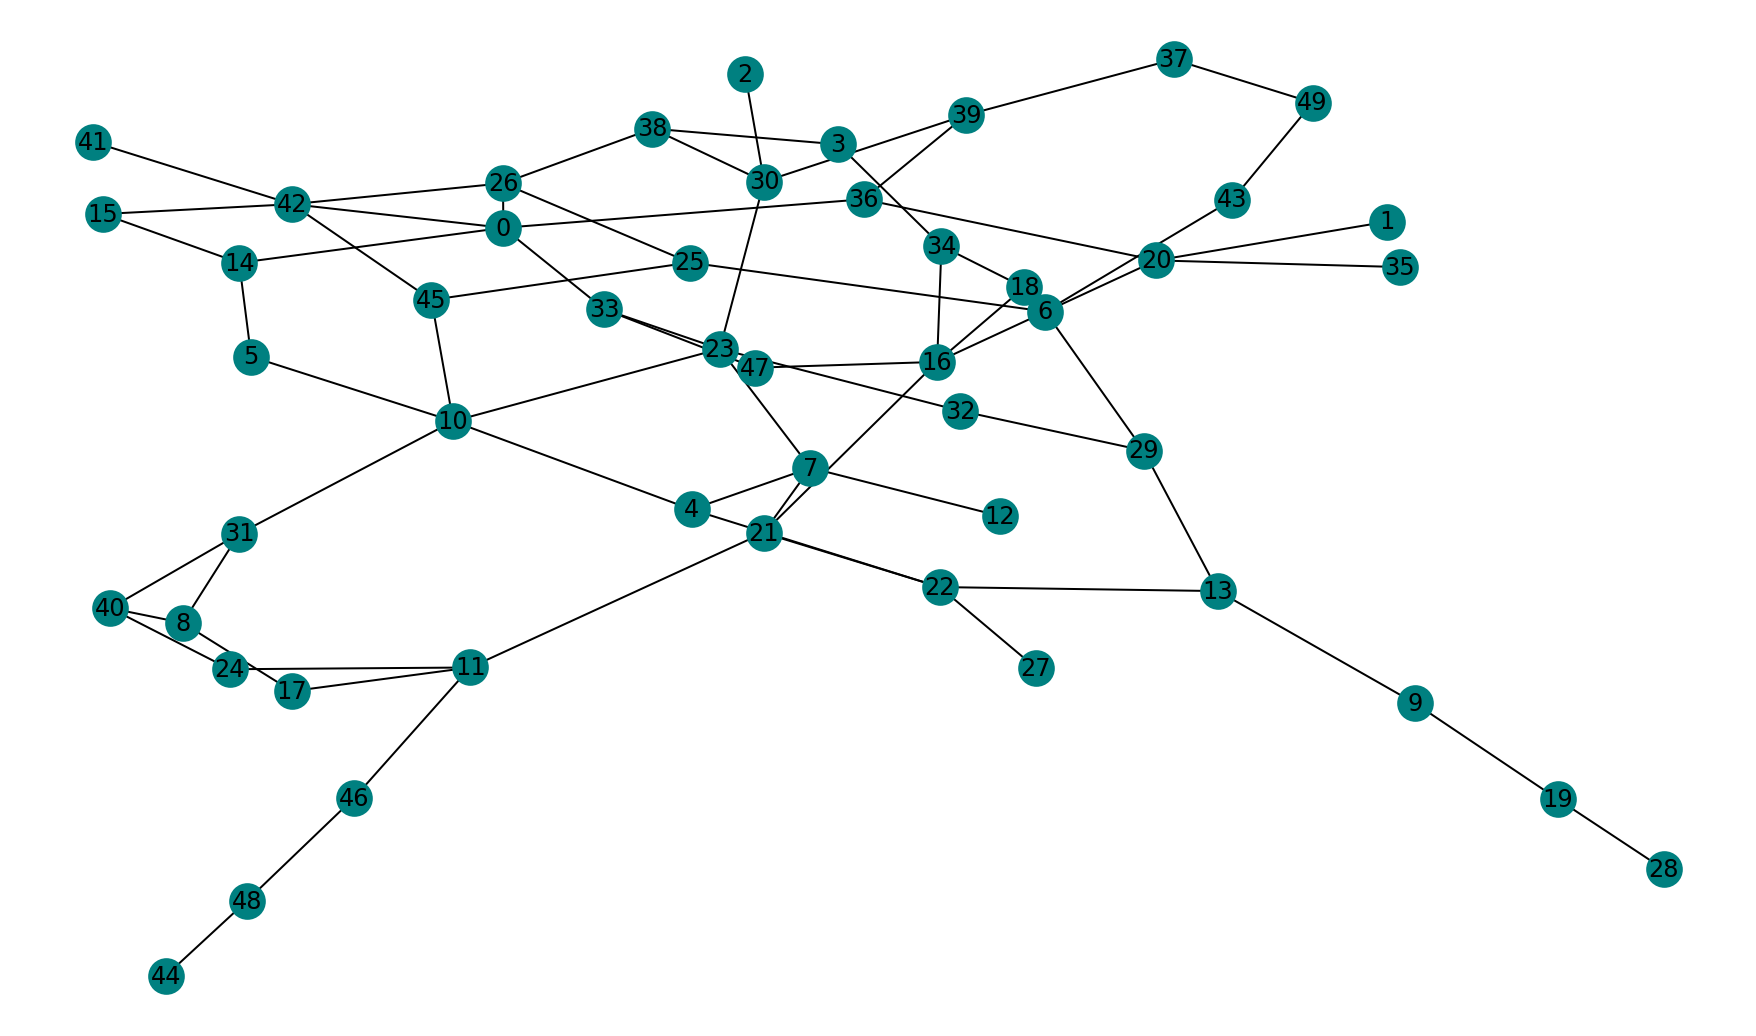

In [11]:
n = 50
p = 0.05
network = nx.erdos_renyi_graph(n, p, seed = 5000, directed = False)
pos = nx.random_layout(network)
nx.draw(network, with_labels = True,node_color='teal')

In [12]:
nx.is_connected(network)

True

## 2. Fractional Threshold Model
1. Implement an algorithm to simulate the information spread using the fractional threshold model. Consider a synchronous implementation.
2. Complete the following considering a copy of the network at the section 1:
    
    a) Initialize as 'Active' a random sample with 10% of the total network. The rest of the network will be initialized as 'Inactive'.
    
    b) How much nodes are vulnerable nodes?
    
    c) Simulate the information spread with $\theta = \frac{1}{2}$ until no further nodes can be activate. Plot the proportion of nodes in each state ('Active' and 'Inactive') at each step of the simulation.
    
    d) Create an animation (GIF Image) showing the state of the graph at each step.  

## A)

In [13]:
nodes_sample = sorted(random.sample(list(network.nodes()),(int (nx.number_of_nodes(network)*.1))))
nodes_sample

[4, 17, 35, 36, 41]

In [14]:
#For vulnerable nodes..
for i in nodes_sample:
    print("Node",i,"has as neighbours: ",list(nx.neighbors(network,i)))

Node 4 has as neighbours:  [7, 10, 22]
Node 17 has as neighbours:  [8, 11]
Node 35 has as neighbours:  [20]
Node 36 has as neighbours:  [0, 20, 39]
Node 41 has as neighbours:  [42]


In [15]:
def initial_state(network):
    state = {}
    for node in network.nodes:
        state[node] = 'Inactive'
    for i in nodes_sample:
        state[i] = 'Active'
    return state

In [16]:
initial_state(network)

{0: 'Inactive',
 1: 'Inactive',
 2: 'Inactive',
 3: 'Inactive',
 4: 'Active',
 5: 'Inactive',
 6: 'Inactive',
 7: 'Inactive',
 8: 'Inactive',
 9: 'Inactive',
 10: 'Inactive',
 11: 'Inactive',
 12: 'Inactive',
 13: 'Inactive',
 14: 'Inactive',
 15: 'Inactive',
 16: 'Inactive',
 17: 'Active',
 18: 'Inactive',
 19: 'Inactive',
 20: 'Inactive',
 21: 'Inactive',
 22: 'Inactive',
 23: 'Inactive',
 24: 'Inactive',
 25: 'Inactive',
 26: 'Inactive',
 27: 'Inactive',
 28: 'Inactive',
 29: 'Inactive',
 30: 'Inactive',
 31: 'Inactive',
 32: 'Inactive',
 33: 'Inactive',
 34: 'Inactive',
 35: 'Active',
 36: 'Active',
 37: 'Inactive',
 38: 'Inactive',
 39: 'Inactive',
 40: 'Inactive',
 41: 'Active',
 42: 'Inactive',
 43: 'Inactive',
 44: 'Inactive',
 45: 'Inactive',
 46: 'Inactive',
 47: 'Inactive',
 48: 'Inactive',
 49: 'Inactive'}

In [17]:
nx.set_node_attributes(network, initial_state(network), 'state')

## B)

In [18]:
Current_state = initial_state(network)

In [19]:
def neighbors_state(nodo):
    Ne = list(nx.neighbors(network,nodo))
    for i in Ne:
        if Current_state[i] == 'Active':
            return True
        elif Current_state[i] == 'Vulnerable':
            return True
    return False 

In [20]:
n=1
while(n != 0):
    n=0
    for node in network.nodes:
        if Current_state[node] == 'Inactive':
            if neighbors_state(node) == True:
                Ne = list(nx.neighbors(network,node))
                for i in range(len(Ne)-1):
                    if (abs(node - Ne[i]) % 3)  == 2:
                        Current_state[node] = 'Vulnerable'
                        n += 1
Current_state

{0: 'Vulnerable',
 1: 'Inactive',
 2: 'Inactive',
 3: 'Inactive',
 4: 'Active',
 5: 'Vulnerable',
 6: 'Inactive',
 7: 'Vulnerable',
 8: 'Vulnerable',
 9: 'Inactive',
 10: 'Vulnerable',
 11: 'Inactive',
 12: 'Inactive',
 13: 'Inactive',
 14: 'Vulnerable',
 15: 'Inactive',
 16: 'Vulnerable',
 17: 'Active',
 18: 'Vulnerable',
 19: 'Inactive',
 20: 'Inactive',
 21: 'Vulnerable',
 22: 'Inactive',
 23: 'Inactive',
 24: 'Inactive',
 25: 'Inactive',
 26: 'Vulnerable',
 27: 'Inactive',
 28: 'Inactive',
 29: 'Inactive',
 30: 'Vulnerable',
 31: 'Vulnerable',
 32: 'Inactive',
 33: 'Inactive',
 34: 'Inactive',
 35: 'Active',
 36: 'Active',
 37: 'Inactive',
 38: 'Vulnerable',
 39: 'Inactive',
 40: 'Vulnerable',
 41: 'Active',
 42: 'Inactive',
 43: 'Inactive',
 44: 'Inactive',
 45: 'Vulnerable',
 46: 'Inactive',
 47: 'Inactive',
 48: 'Inactive',
 49: 'Inactive'}

In [21]:
node_color = []
for node in network:
    if Current_state[node] ==  'Inactive':
        node_color.append('teal')
    elif Current_state[node] == 'Vulnerable':
        node_color.append('yellow')
    else:
        node_color.append('orange')#Actives

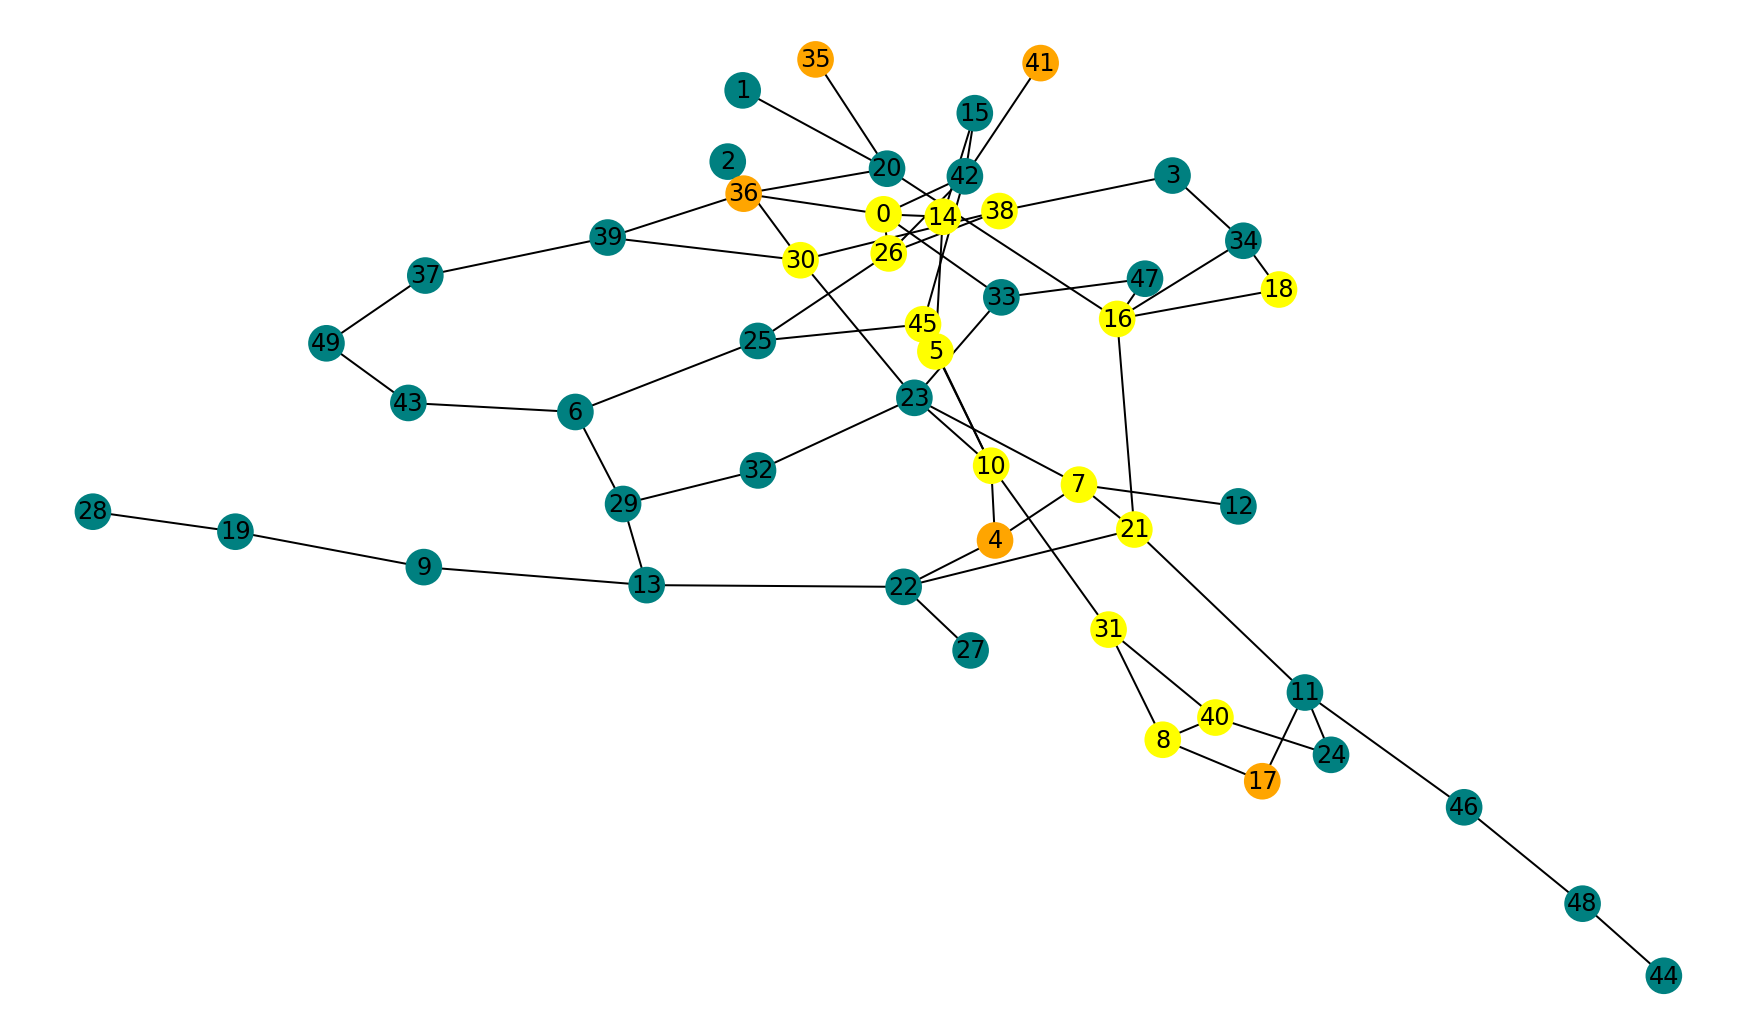

In [22]:
nx.draw(network, node_color= node_color, with_labels=True)

In [23]:
count = 0
for node in network:
    if Current_state[node] == 'Vulnerable':
        count +=1
print("The number of vulnerables nodes are:",count)

The number of vulnerables nodes are: 15


## C)

In [24]:
theta = 0.5
def state_transition(network, current_state):
    next_state = {}
    c_ac = 5
    c_in = 45
    Ac = [c_ac]
    In = [c_in]
    
    for node in network.nodes:
        n = 0
        if current_state[node] == 'Inactive':
            for i in list(nx.neighbors(network,node)):
                for j in nodes_sample:
                    if (i == j):
                        n += 1
        k = network.degree[node]
        if (n/k) >= theta:
            next_state[node] = 'Active'
            c_ac += 1
            c_in -= 1
    Ac.append(c_ac)
    In.append(c_in)
    s = [0,1]
    

    fig,ax = plt.subplots(figsize=(9,4))
    plt.plot(np.array(s),np.array(In)*0.02,label='inactive')
    plt.plot(np.array(s),np.array(Ac)*0.02,label='active')
    plt.title('Node State Proportion')
    plt.xlabel('Simulation step')
    plt.ylabel('Proportion of nodes')
    plt.legend()
    return next_state

{20: 'Active'}

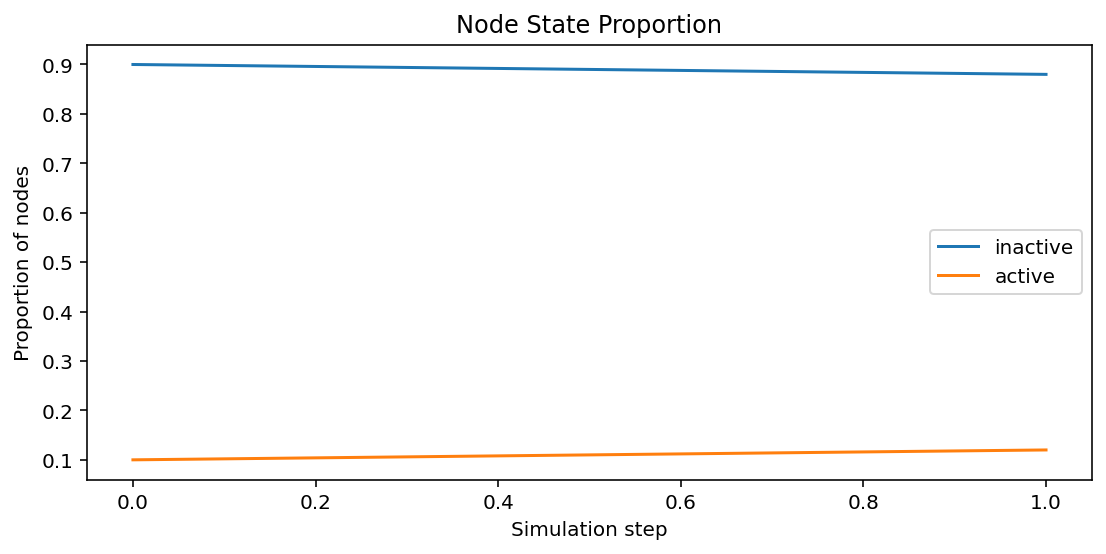

In [25]:
test_state = initial_state(network)
state_transition(network, test_state)

In [26]:
def run(network, steps=1):
    for _ in range(steps):
        step(network)
        
def step(network):
    state = nx.get_node_attributes(network, 'state')
    new_state = state_transition(network, state)
    state.update(new_state)
    nx.set_node_attributes(network, state, 'state')
    
def draw(self, labels=None, **kwargs):

    state = self.state(step)
    node_colors = [self._categorical_color(state[n]) for n in self.network.nodes]
    nx.draw(self.network, pos=self._pos, node_color=node_colors, **kwargs)

    if labels is None:
        labels = sorted(set(state.values()), key=self._value_index.get)
        patches = [mpl.patches.Patch(color=self._categorical_color(l), label=l) for l in labels]
        plt.legend(handles=patches)

    if step == -1:
        step = self.steps
    if step == 0:
        title = 'initial state'
    else:
        title = 'step %i' % (step)
    if self.name:
        title = '{}: {}'.format(self.name, title)
    plt.title(title)

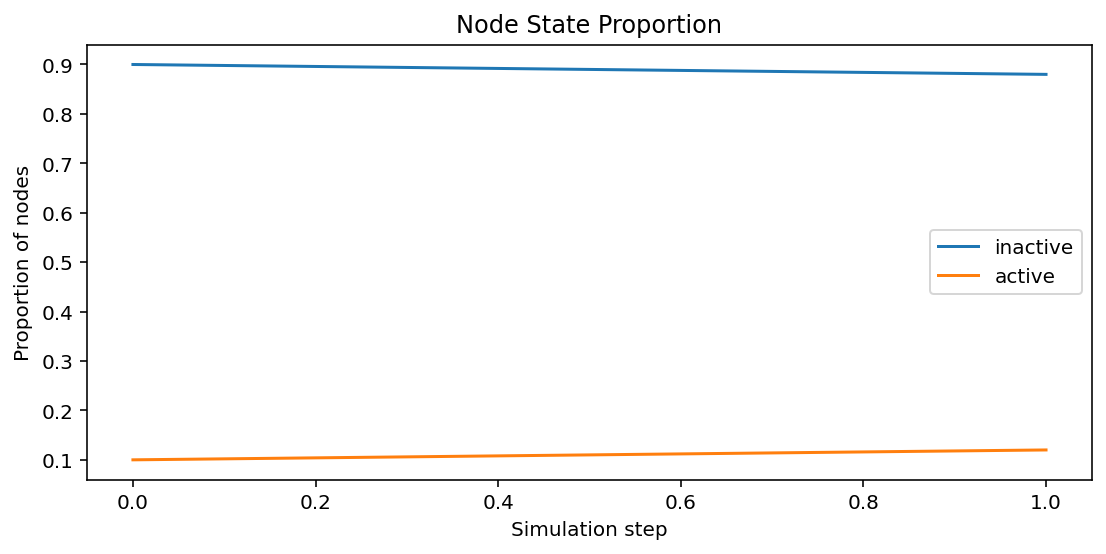

In [27]:
nx.set_node_attributes(network, initial_state(network), 'state')
run(network, steps = 1)

In [28]:
aux = 0
for node in network:
    if Current_state[node] == 'Active':
        aux +=1
print("The number of vulnerables nodes are:",aux)

The number of vulnerables nodes are: 5


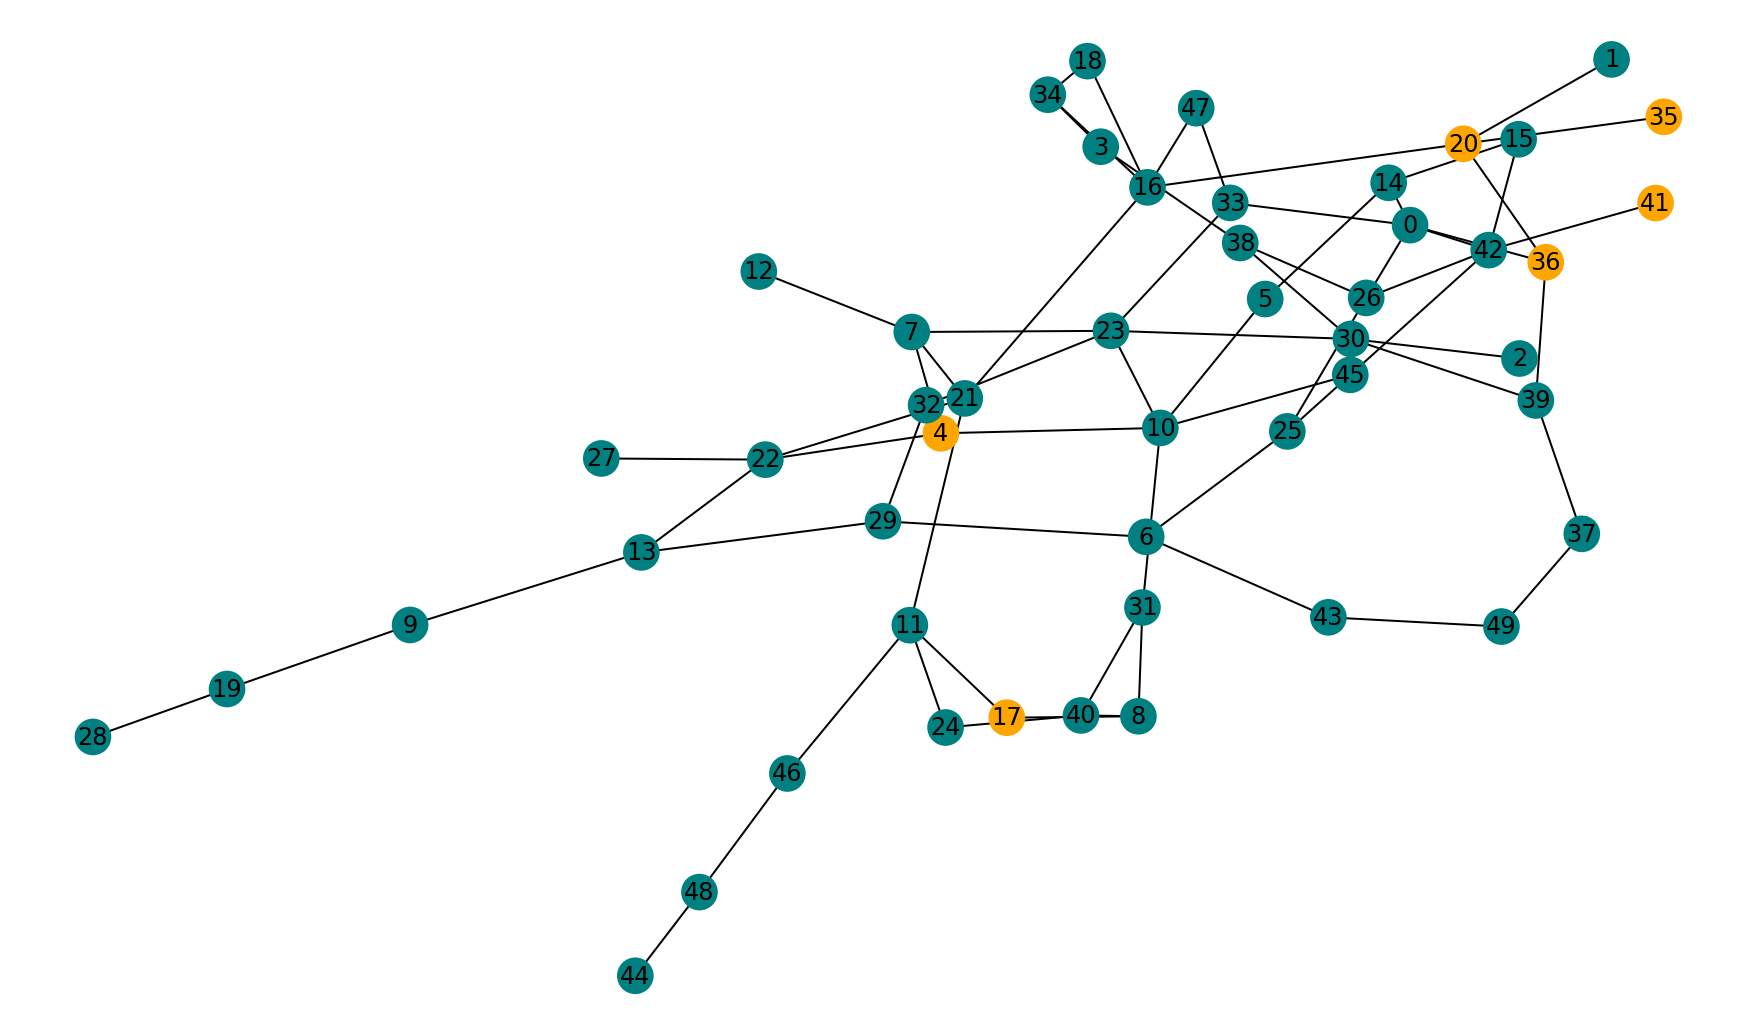

In [29]:
random_node_colors = ['orange' if node[1] == 'Active' else 'teal' for node in network.nodes(data = 'state')]
nx.draw(network, node_color=random_node_colors, with_labels=True)

In [30]:
aux = 0
for node in network:
    if Current_state[node] == 'Active':
        aux +=1
print("The number of vulnerables nodes are:",aux)

The number of vulnerables nodes are: 5


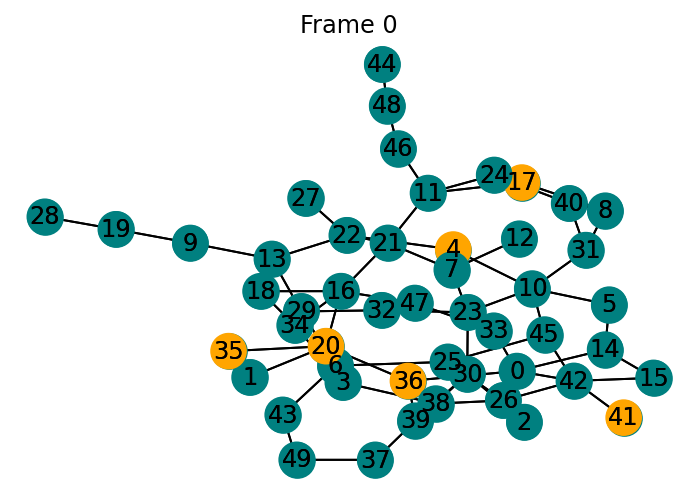

In [31]:
def simple_update(num, n, layout, G, ax):
    ax.clear()

    # Draw the graph with random node colors
    
    random_colors = random_node_colors 
    #nx.set_node_attributes(network, initial_state(network), 'state')
    nx.draw(G, pos = layout, node_color='teal',with_labels=True,ax=ax)
    nx.draw(G, pos = layout, node_color=random_colors,with_labels=True,ax=ax)

    # Set the title
    ax.set_title("Frame {}".format(num))


def simple_animation():

    # Build plot
    fig, ax = plt.subplots(figsize=(6,4))
    layout = nx.kamada_kawai_layout(network)
    ani = animation.FuncAnimation(fig, simple_update, frames=5, fargs=(n, layout, network, ax))
    ani.save('animation_11.gif', writer='pillow')

    plt.show()

simple_animation()

##### Interpretation 
In the fractional threshold model a part of the network will be chosen, whose sample will be the nodes already active to determine our vulnerable nodes. Once the vulnerable nodes have been obtained (exercise B); We can conclude, how the following nodes to activate will be cataloged. In this figure, no node is being activated, since the sample, such as a random sample of the nodes, their neighbors, not all of them will be vulnerable. It depends on the sample of nodes, such as this 10%, the active nodes will be illustrated and therefore some will be activated.

## 3. Independent Cascade Model

1. Implement an algorithm to simulate the information spread using the a independent cascade model.
2. Complete the following considering a copy of the network at the section 1:
    
    a) Initialize as 'Active' a random sample with 10% of the total network. The rest of the network will be initialized as 'Inactive'.
        
    b) Simulate the information until no further nodes can be activate. Consider that the probability $P_{v,w}$, i. e. probability that node w gets activated due to v, is given by a constant P = 0.5 for any node in the network. Plot the proportion of nodes in each state ('Active' and 'Inactive') at each step of the simulation.
    
    c) Create an animation (GIF Image) showing the state of the graph at each step. 

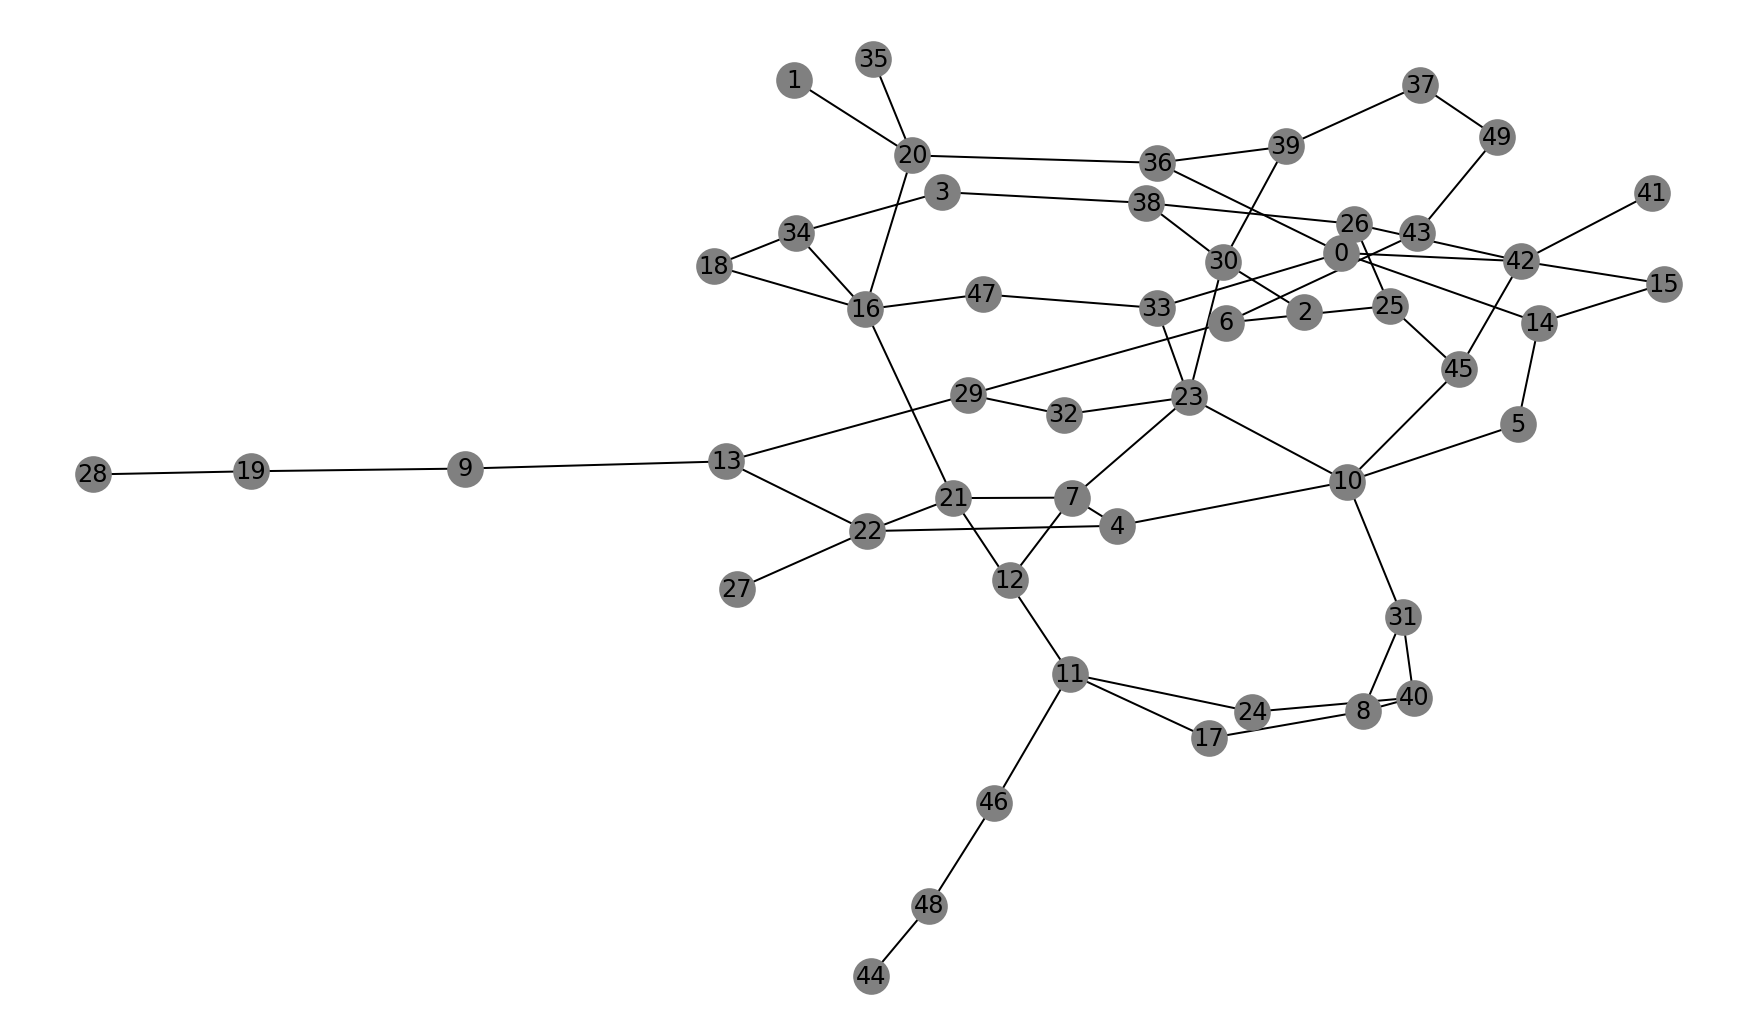

In [32]:
n = 50
p = 0.05
network = nx.erdos_renyi_graph(n, p, seed = 5000, directed = False)
pos = nx.random_layout(network)
nx.draw(network, with_labels = True,node_color='gray')

## a)

In [33]:
A0 = sorted(random.sample(list(network.nodes()),(int (nx.number_of_nodes(network)*.1))))
A0

[9, 12, 24, 29, 41]

In [34]:
def initial_state(network):
    state = {}
    for node in network.nodes:
        state[node] = 'Inactive'

    for i in A0:
        state[i] = 'Active'
    return state

initial_state(network)

{0: 'Inactive',
 1: 'Inactive',
 2: 'Inactive',
 3: 'Inactive',
 4: 'Inactive',
 5: 'Inactive',
 6: 'Inactive',
 7: 'Inactive',
 8: 'Inactive',
 9: 'Active',
 10: 'Inactive',
 11: 'Inactive',
 12: 'Active',
 13: 'Inactive',
 14: 'Inactive',
 15: 'Inactive',
 16: 'Inactive',
 17: 'Inactive',
 18: 'Inactive',
 19: 'Inactive',
 20: 'Inactive',
 21: 'Inactive',
 22: 'Inactive',
 23: 'Inactive',
 24: 'Active',
 25: 'Inactive',
 26: 'Inactive',
 27: 'Inactive',
 28: 'Inactive',
 29: 'Active',
 30: 'Inactive',
 31: 'Inactive',
 32: 'Inactive',
 33: 'Inactive',
 34: 'Inactive',
 35: 'Inactive',
 36: 'Inactive',
 37: 'Inactive',
 38: 'Inactive',
 39: 'Inactive',
 40: 'Inactive',
 41: 'Active',
 42: 'Inactive',
 43: 'Inactive',
 44: 'Inactive',
 45: 'Inactive',
 46: 'Inactive',
 47: 'Inactive',
 48: 'Inactive',
 49: 'Inactive'}

In [35]:
nx.set_node_attributes(network, initial_state(network), 'state')

## b)

In [36]:
#Probability_constant
P_vw = 0.5

In [37]:
A0 != []

True

In [38]:
def state_transition(network,A0):
    next_state = {}
    
    c_ac = 5
    c_in = 45
    Ac = [c_ac]
    In = [c_in]
    count = 0
    steps = [count]
    
    N_actives = A0
    while A0 != []:
        Ainf = []
        for v in A0:
            for w in list(nx.neighbors(network,v)):
                if(w not in N_actives):
                    r = random.random()
                    if (r < P_vw):
                        Ainf.append(w)
                        
                        N_actives.append(w)
                        next_state[w] = 'Active'
                        c_ac += 1
                        c_in -= 1
        
        A0 = Ainf
        Ac.append(c_ac)
        In.append(c_in)
        count += 1
        steps.append(count)
    print(Ac,In)
    fig,ax = plt.subplots(figsize=(9,4))
    plt.plot(np.array(steps),np.array(In)*0.02,label='inactive')
    plt.plot(np.array(steps),np.array(Ac)*0.02,label='active')
    plt.title('Node State Proportion ')
    plt.xlabel('Simulation step')
    plt.ylabel('Proportion of nodes')
    plt.legend()
    
    return next_state#, Ac, In, count, A0,steps

[5, 32, 37, 40, 41, 41] [45, 18, 13, 10, 9, 9]


{13: 'Active',
 7: 'Active',
 11: 'Active',
 40: 'Active',
 6: 'Active',
 32: 'Active',
 22: 'Active',
 4: 'Active',
 21: 'Active',
 23: 'Active',
 8: 'Active',
 31: 'Active',
 25: 'Active',
 10: 'Active',
 16: 'Active',
 33: 'Active',
 26: 'Active',
 5: 'Active',
 45: 'Active',
 18: 'Active',
 34: 'Active',
 47: 'Active',
 42: 'Active',
 3: 'Active',
 15: 'Active',
 14: 'Active',
 0: 'Active',
 17: 'Active',
 46: 'Active',
 27: 'Active',
 20: 'Active',
 38: 'Active',
 1: 'Active',
 35: 'Active',
 30: 'Active',
 2: 'Active'}

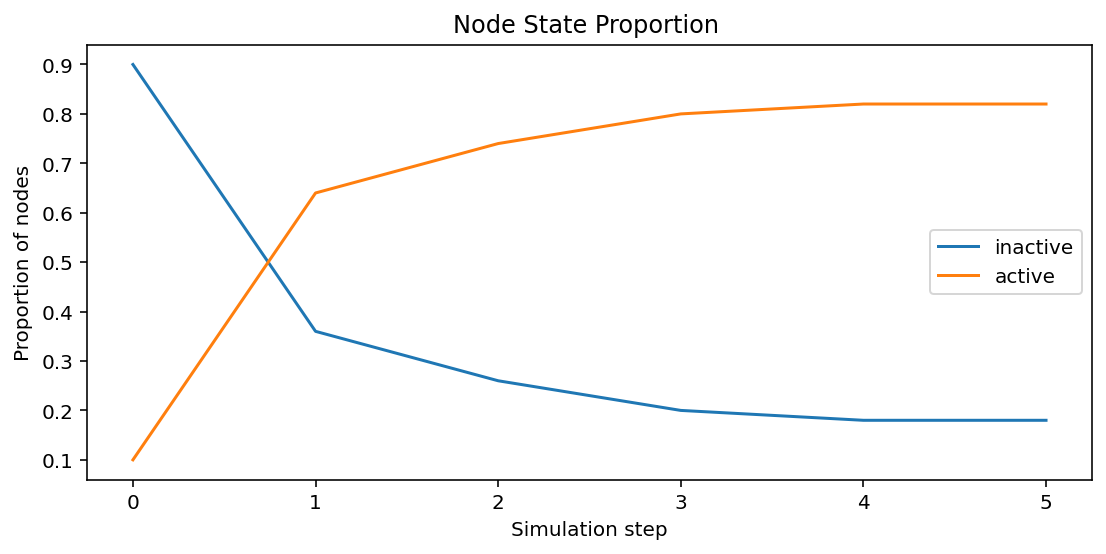

In [39]:
state_transition(network,A0)

In [40]:
def run(network, steps=1):
    for _ in range(steps):
        step(network)
        
def step(network):
    state = nx.get_node_attributes(network, 'state')
    new_state = state_transition(network, state)
    state.update(new_state)
    nx.set_node_attributes(network, state, 'state')
    
def draw(self, labels=None, **kwargs):

    state = self.state(step)
    node_colors = [self._categorical_color(state[n]) for n in self.network.nodes]
    nx.draw(self.network, pos=self._pos, node_color=node_colors, **kwargs)

    if labels is None:
        labels = sorted(set(state.values()), key=self._value_index.get)
        patches = [mpl.patches.Patch(color=self._categorical_color(l), label=l) for l in labels]
        plt.legend(handles=patches)

    if step == -1:
        step = self.steps
    if step == 0:
        title = 'initial state'
    else:
        title = 'step %i' % (step)
    if self.name:
        title = '{}: {}'.format(self.name, title)
    plt.title(title)

[5, 5] [45, 45]


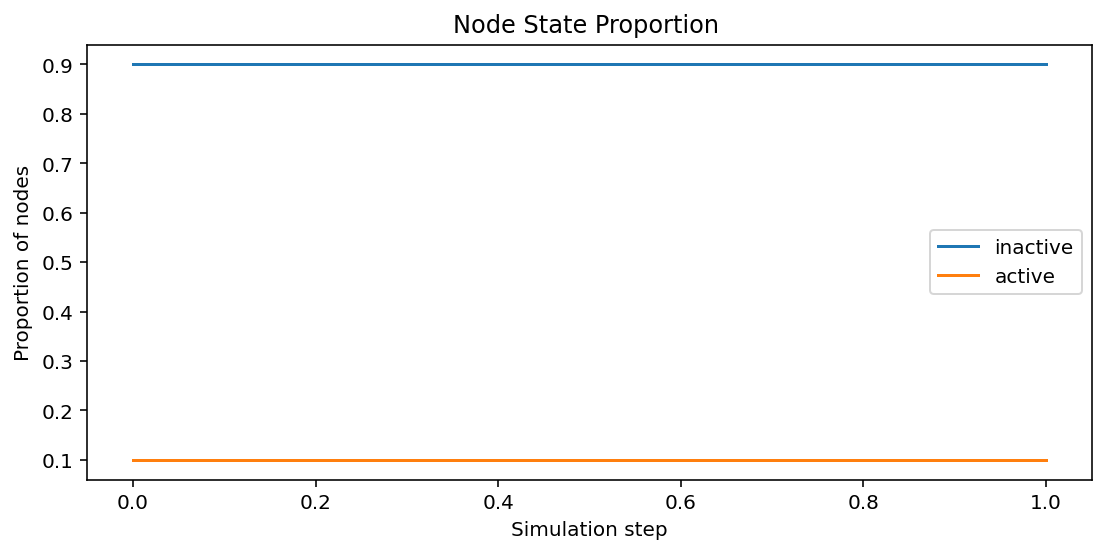

In [41]:
#Ignore this graphic
nx.set_node_attributes(network, initial_state(network), 'state')
run(network, steps = 1)

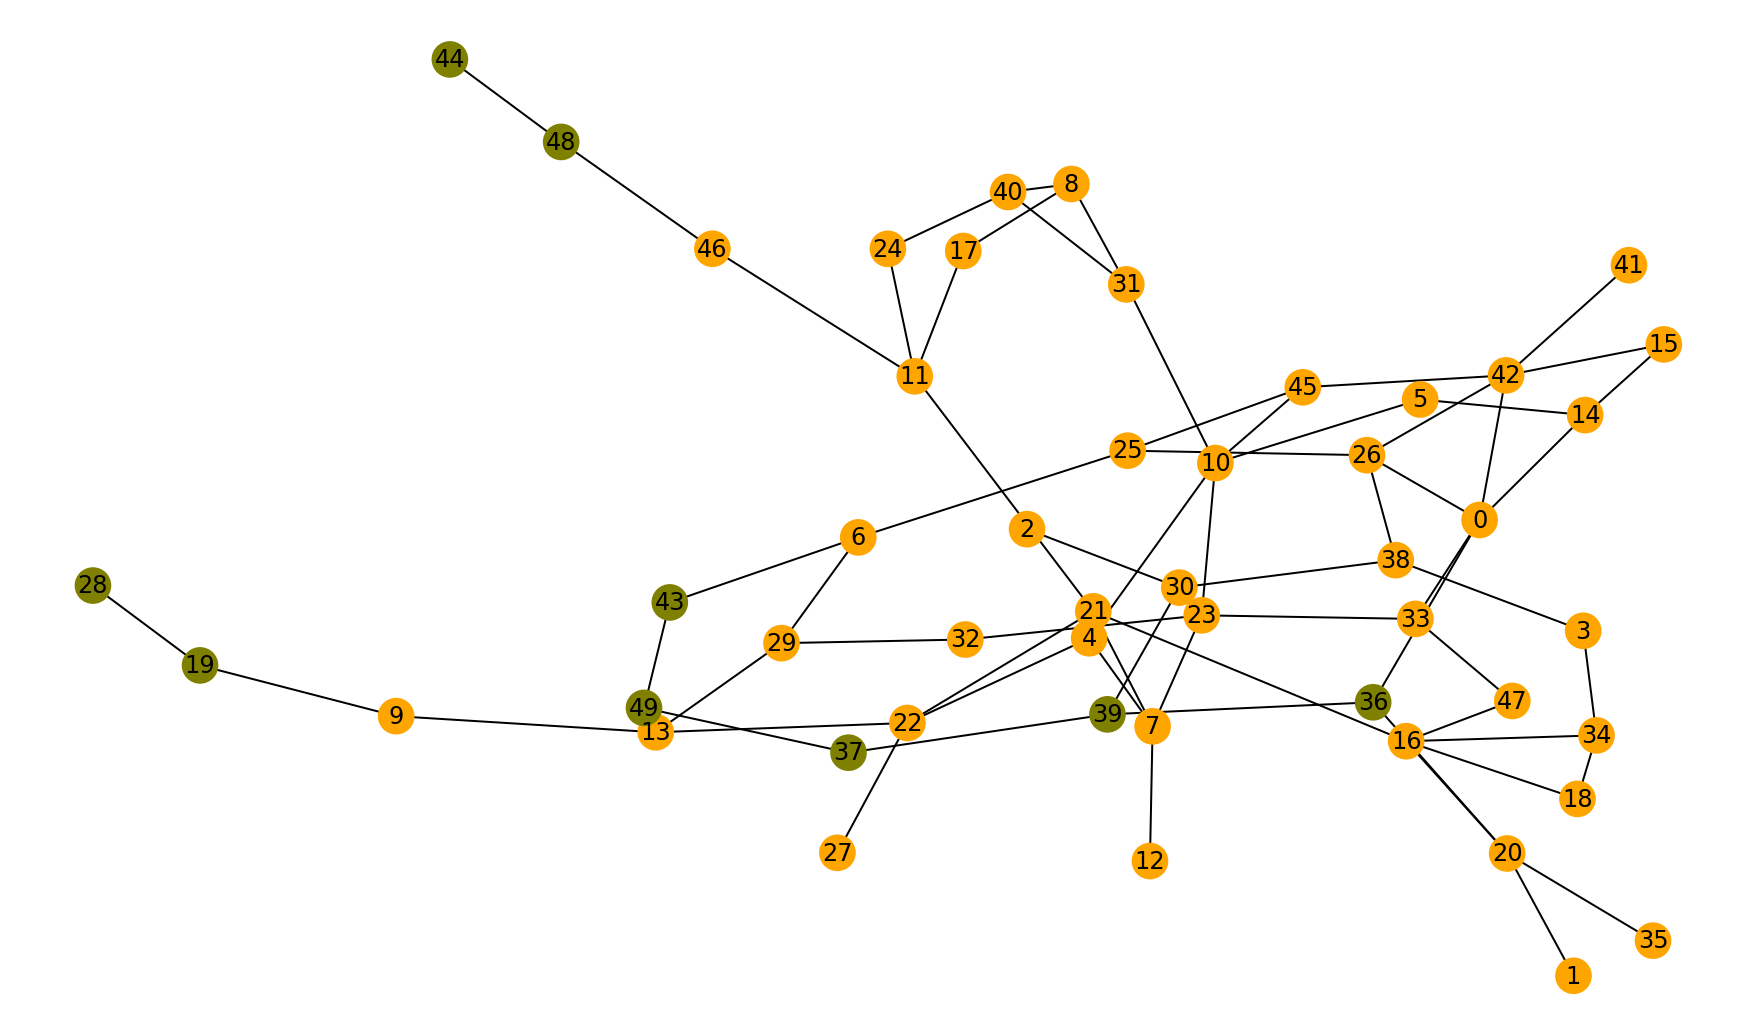

In [42]:
random_node_colors = ['orange' if node[1] == 'Active' else 'olive' for node in network.nodes(data = 'state')]
nx.draw(network, node_color=random_node_colors, with_labels=True)

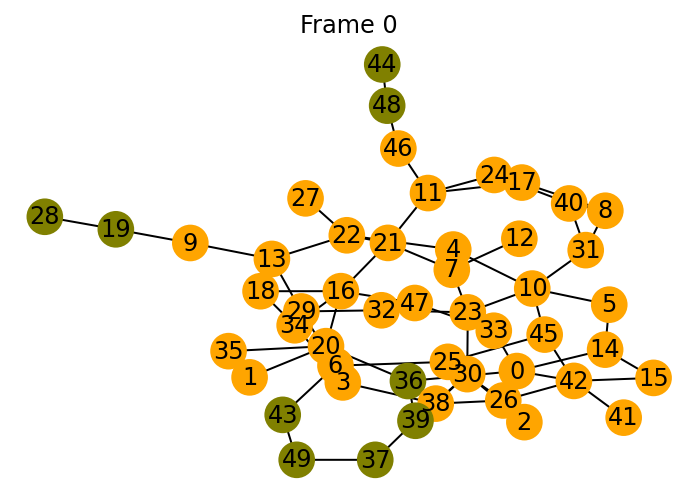

In [43]:
def simple_update(num, n, layout, G, ax):
    ax.clear()

    # Draw the graph with random node colors
    
    random_colors = random_node_colors 
    #nx.set_node_attributes(network, initial_state(network), 'state')
    nx.draw(G, pos = layout, node_color=random_colors,with_labels=True,ax=ax)

    # Set the title
    ax.set_title("Frame {}".format(num))


def simple_animation():

    # Build plot
    fig, ax = plt.subplots(figsize=(6,4))
    layout = nx.kamada_kawai_layout(network)
    ani = animation.FuncAnimation(fig, simple_update, frames=10, fargs=(n, layout, network, ax))
    ani.save('animation_12.gif', writer='imagemagick')

    plt.show()

simple_animation()

##### Interpretation
2 more nodes were activated, because the independent cascade model will be comparing node by node, depending on the value of p, where p is the probability. Taking this into account, it will activate the vulnerable nodes, depending on how far the neighbors are.
So, many more nodes were activated, because their degree was much greater than P, which is equal to 0.5. So if any node has a greater degree of 0.5, the node will be activated, in this case there were more. No more nodes were activated, because no other node had another modality equal to theta.

## 4. Maximazing the Information Spread

1. Implement the algorithm to find the set S with size k that maximize the information spread based on the Greedy Algorithm proposed by Kempe (2003). 
2. Find the set S with size k = 10 that maximize the influence for each Network taking into account that the probability $P_{v,w}$, i. e. probability that node w gets activated due to v, is given by a constant P = 0.5 for any node in the network.

In [44]:
def IC(g,S,p=0.5,mc=1000):
    """
    Input:  graph object, set of seed nodes, propagation probability
            and the number of Monte-Carlo simulations
    Output: average number of nodes influenced by the seed nodes
    """
    
    # Loop over the Monte-Carlo Simulations
    spread = []
    for i in range(mc):
        
        # Simulate propagation process      
        new_active, A = S[:], S[:]
        while new_active:

            # For each newly active node, find its neighbors that become activated
            new_ones = []
            for node in new_active:
                
                # Determine neighbors that become infected
                np.random.seed(i)
                success = np.random.uniform(0,1,len(list(g.neighbors(node)))) < p
                new_ones += list(np.extract(success, list(g.neighbors(node))))

            new_active = list(set(new_ones) - set(A))
            
            # Add newly activated nodes to the set of activated nodes
            A += new_active
            
        spread.append(len(A))
        
    return(np.mean(spread))

In [45]:
def greedy(g,k,p=0.1,mc=1000):
    """
    Input:  graph object, number of seed nodes
    Output: optimal seed set, resulting spread, time for each iteration
    """

    S, spread, timelapse, start_time = [], [], [], time.time()
    
    # Find k nodes with largest marginal gain
    for _ in range(k):

        # Loop over nodes that are not yet in seed set to find biggest marginal gain
        best_spread = 0
        for j in set(range(nx.number_of_nodes(g)))-set(S):

            # Get the spread
            s = IC(g,S + [j],p,mc)

            # Update the winning node and spread so far
            if s > best_spread:
                best_spread, node = s, j

        # Add the selected node to the seed set
        S.append(node)
        
        # Add estimated spread and elapsed time
        spread.append(best_spread)
        timelapse.append(time.time() - start_time)

    return(S,spread,timelapse)
    return(S,spread,timelapse)

In [46]:
greedy_output = greedy(network,10)

In [47]:
print("greedy output: " + str(greedy_output[0]))

greedy output: [45, 39, 8, 29, 0, 21, 28, 47, 35, 46]
